In [1]:
import pandas as pd
import numpy as np 
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

%matplotlib inline 
import matplotlib.pyplot as plt

"Everything you are doing in this task is centered around a Regression problem"

In [2]:
credit1=pd.read_csv('export_credit1.csv')

In [3]:
credit1.head()

Unnamed: 0  Unnamed: 0.1  ID  CREDITLIMIT     SEX   EDUCATION  \
0           0             0   1        20000  female  university   
1           1             1   2       120000  female  university   
2           2             2   3        90000  female  university   
3           3             3   4        50000  female  university   
4           4             4   5        50000    male  university   

   MARRIAGESTATUS  AGE  APRPAYSTATUS  MAYPAYSTATUS  ...  JUNSTMT  MAYSTMT  \
0               1   24             2             2  ...        0        0   
1               2   26            -1             2  ...     3272     3455   
2               2   34             0             0  ...    14331    14948   
3               1   37             0             0  ...    28314    28959   
4               1   57            -1             0  ...    20940    19146   

   APRSTMT  SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  \
0        0             0           689             0             0   
1     3261             0          1000          1000          1000   
2    15549          1518          1500          1000          1000   
3    29547          2000          2019          1200          1100   
4    19131          2000         36681         10000          9000   

   MAYPREVPYMNT  APRPREVPYMNT  default payment next month  
0             0             0                     default  
1             0          2000                     default  
2          1000          5000                 not default  
3          1069          1000                 not default  
4           689           679                 not default  

[5 rows x 27 columns]

In [4]:
credit1['default']=credit1['default payment next month']
credit1=credit1.drop(['ID','Unnamed: 0','Unnamed: 0.1','default payment next month'], axis=1)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
le = preprocessing.LabelEncoder()
le.fit(credit1['SEX'])
credit1['SEX']=le.transform(credit1['SEX'])

In [7]:
le = preprocessing.LabelEncoder()
le.fit(credit1['default'])
credit1['default']=le.transform(credit1['default'])

In [8]:
credit1.dtypes

CREDITLIMIT        int64
SEX                int32
EDUCATION         object
MARRIAGESTATUS     int64
AGE                int64
APRPAYSTATUS       int64
MAYPAYSTATUS       int64
JUNPAYSTATUS       int64
JULPAYSTATUS       int64
AUGPAYSTATUS       int64
SEPPAYSTATUS       int64
SEPSTMT            int64
AUGSTMT            int64
JULSTMT            int64
JUNSTMT            int64
MAYSTMT            int64
APRSTMT            int64
SEPPREVPYMNT       int64
AUGPREVPYMNT       int64
JULPREVPYMNT       int64
JUNPREVPYMNT       int64
MAYPREVPYMNT       int64
APRPREVPYMNT       int64
default            int32
dtype: object

In [9]:
credit1=pd.get_dummies(credit1)

In [10]:
credit=credit1

In [11]:
credit['APRPAYSTATUS']=credit['APRPAYSTATUS'].replace(-2,0)
credit['MAYPAYSTATUS']=credit['MAYPAYSTATUS'].replace(-2,0)
credit['JUNPAYSTATUS']=credit['JUNPAYSTATUS'].replace(-2,0)
credit['JULPAYSTATUS']=credit['JULPAYSTATUS'].replace(-2,0)
credit['AUGPAYSTATUS']=credit['AUGPAYSTATUS'].replace(-2,0)
credit['SEPPAYSTATUS']=credit['SEPPAYSTATUS'].replace(-2,0)


credit['APRPAYSTATUS']=credit['APRPAYSTATUS'].replace(-1,0)
credit['MAYPAYSTATUS']=credit['MAYPAYSTATUS'].replace(-1,0)
credit['JUNPAYSTATUS']=credit['JUNPAYSTATUS'].replace(-1,0)
credit['JULPAYSTATUS']=credit['JULPAYSTATUS'].replace(-1,0)
credit['AUGPAYSTATUS']=credit['AUGPAYSTATUS'].replace(-1,0)
credit['SEPPAYSTATUS']=credit['SEPPAYSTATUS'].replace(-1,0)

In [12]:
pd.qcut(credit['CREDITLIMIT'],q=5, labels=False)

0        0
1        2
2        1
3        0
4        0
        ..
29995    3
29996    2
29997    0
29998    1
29999    0
Name: CREDITLIMIT, Length: 30000, dtype: int64

In [13]:
credit['CREDLIM_CAT']=pd.qcut(credit['CREDITLIMIT'],q=5, labels=False)

In [14]:
pd.qcut(credit['AGE'],q=5, labels=False)

0        0
1        0
2        2
3        2
4        4
        ..
29995    3
29996    3
29997    2
29998    3
29999    4
Name: AGE, Length: 30000, dtype: int64

In [16]:
credit['AGE_CAT']=pd.qcut(credit['AGE'],q=5, labels=False)

In [19]:
import seaborn as sns

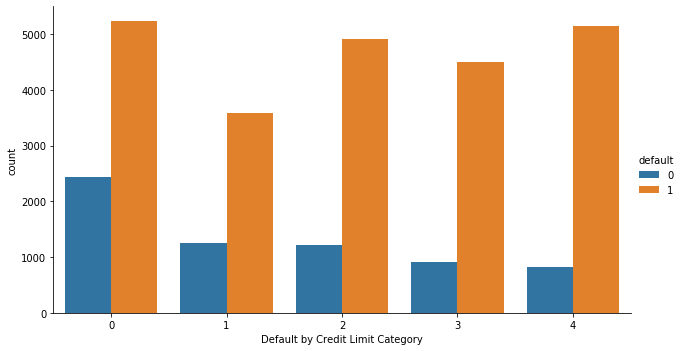

In [29]:
#it doesn't matter which credit limit bin customers are in, default rates appear to be high
g = sns.catplot('CREDLIM_CAT', data=credit1, hue='default', kind='count', aspect=1.75)
g.set_xlabels('Default by Credit Limit Category')

In [26]:
credit.dtypes

CREDITLIMIT                  int64
SEX                          int32
MARRIAGESTATUS               int64
AGE                          int64
APRPAYSTATUS                 int64
MAYPAYSTATUS                 int64
JUNPAYSTATUS                 int64
JULPAYSTATUS                 int64
AUGPAYSTATUS                 int64
SEPPAYSTATUS                 int64
SEPSTMT                      int64
AUGSTMT                      int64
JULSTMT                      int64
JUNSTMT                      int64
MAYSTMT                      int64
APRSTMT                      int64
SEPPREVPYMNT                 int64
AUGPREVPYMNT                 int64
JULPREVPYMNT                 int64
JUNPREVPYMNT                 int64
MAYPREVPYMNT                 int64
APRPREVPYMNT                 int64
default                      int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
CREDLIM_CAT                  int64
AGE_CAT             

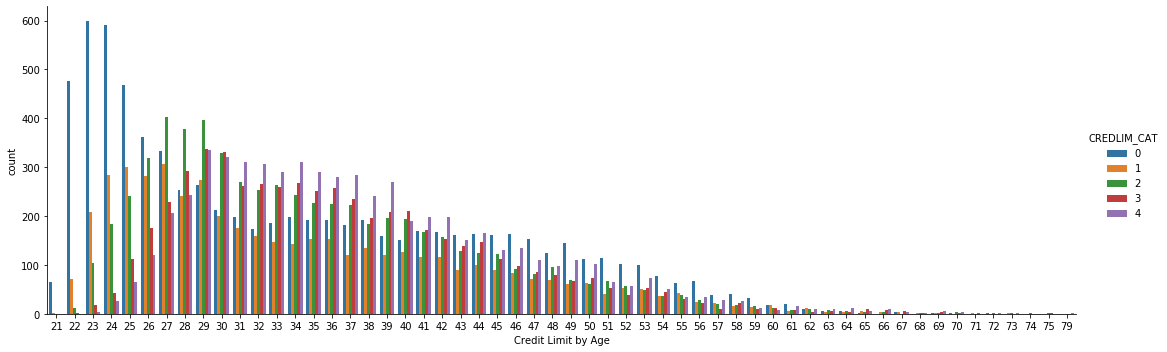

In [32]:
#looks middle age customers are receiving a wide range of credit limit options
g = sns.catplot('AGE', data=credit1, hue='CREDLIM_CAT', kind='count', aspect=3.00)
g.set_xlabels('Credit Limit by Age')

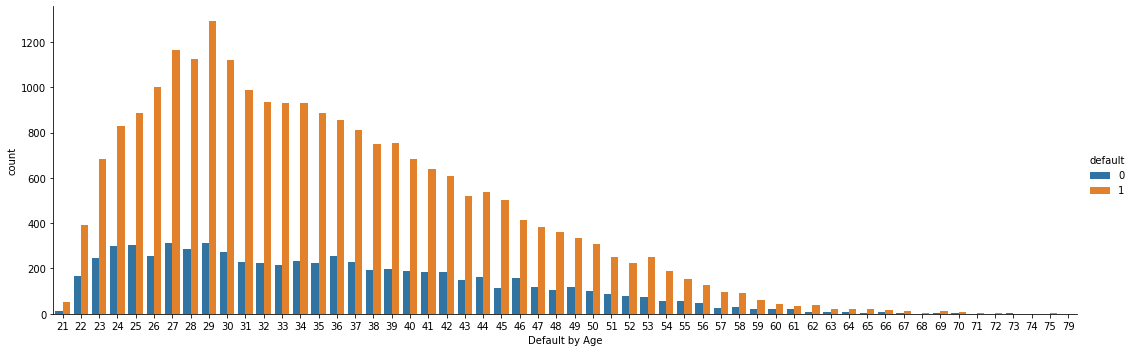

In [40]:
#high default rate with 29 y/o customer base 
g = sns.catplot('AGE', data=credit1, hue='default', kind='count', aspect=3.00)
g.set_xlabels('Default by Age')

In [56]:
credit.head()

CREDITLIMIT  SEX  MARRIAGESTATUS  AGE  APRPAYSTATUS  MAYPAYSTATUS  \
0        20000    0               1   24             2             2   
1       120000    0               2   26             0             2   
2        90000    0               2   34             0             0   
3        50000    0               1   37             0             0   
4        50000    1               1   57             0             0   

   JUNPAYSTATUS  JULPAYSTATUS  AUGPAYSTATUS  SEPPAYSTATUS  ...  JUNPREVPYMNT  \
0             0             0             0             0  ...             0   
1             0             0             0             2  ...          1000   
2             0             0             0             0  ...          1000   
3             0             0             0             0  ...          1100   
4             0             0             0             0  ...          9000   

   MAYPREVPYMNT  APRPREVPYMNT  default  EDUCATION_graduate school  \
0             0             0        0                          0   
1             0          2000        0                          0   
2          1000          5000        1                          0   
3          1069          1000        1                          0   
4           689           679        1                          0   

   EDUCATION_high school  EDUCATION_other  EDUCATION_university  CREDLIM_CAT  \
0                      0                0                     1            0   
1                      0                0                     1            2   
2                      0                0                     1            1   
3                      0                0                     1            0   
4                      0                0                     1            0   

   AGE_CAT  
0        0  
1        0  
2        2  
3        2  
4        4  

[5 rows x 29 columns]

In [62]:
credit.drop(['CREDITLIMIT','EDUCATION_high school','EDUCATION_other','EDUCATION_university','AGE'], axis=1, inplace=True)

In [64]:
credit.head()

SEX  MARRIAGESTATUS  APRPAYSTATUS  MAYPAYSTATUS  JUNPAYSTATUS  \
0    0               1             2             2             0   
1    0               2             0             2             0   
2    0               2             0             0             0   
3    0               1             0             0             0   
4    1               1             0             0             0   

   JULPAYSTATUS  AUGPAYSTATUS  SEPPAYSTATUS  SEPSTMT  AUGSTMT  ...  \
0             0             0             0     3913     3102  ...   
1             0             0             2     2682     1725  ...   
2             0             0             0    29239    14027  ...   
3             0             0             0    46990    48233  ...   
4             0             0             0     8617     5670  ...   

   SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  \
0             0           689             0             0             0   
1             0          1000          1000          1000             0   
2          1518          1500          1000          1000          1000   
3          2000          2019          1200          1100          1069   
4          2000         36681         10000          9000           689   

   APRPREVPYMNT  default  EDUCATION_graduate school  CREDLIM_CAT  AGE_CAT  
0             0        0                          0            0        0  
1          2000        0                          0            2        0  
2          5000        1                          0            1        2  
3          1000        1                          0            0        2  
4           679        1                          0            0        4  

[5 rows x 24 columns]

In [67]:
X = credit.iloc[:,0:23]
print('Summary of feature sample')
X.head()

Summary of feature sample


SEX  MARRIAGESTATUS  APRPAYSTATUS  MAYPAYSTATUS  JUNPAYSTATUS  \
0    0               1             2             2             0   
1    0               2             0             2             0   
2    0               2             0             0             0   
3    0               1             0             0             0   
4    1               1             0             0             0   

   JULPAYSTATUS  AUGPAYSTATUS  SEPPAYSTATUS  SEPSTMT  AUGSTMT  ...  APRSTMT  \
0             0             0             0     3913     3102  ...        0   
1             0             0             2     2682     1725  ...     3261   
2             0             0             0    29239    14027  ...    15549   
3             0             0             0    46990    48233  ...    29547   
4             0             0             0     8617     5670  ...    19131   

   SEPPREVPYMNT  AUGPREVPYMNT  JULPREVPYMNT  JUNPREVPYMNT  MAYPREVPYMNT  \
0             0           689             0             0             0   
1             0          1000          1000          1000             0   
2          1518          1500          1000          1000          1000   
3          2000          2019          1200          1100          1069   
4          2000         36681         10000          9000           689   

   APRPREVPYMNT  default  EDUCATION_graduate school  CREDLIM_CAT  
0             0        0                          0            0  
1          2000        0                          0            2  
2          5000        1                          0            1  
3          1000        1                          0            0  
4           679        1                          0            0  

[5 rows x 23 columns]

In [68]:
y=credit['AGE_CAT']

In [69]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression(fit_intercept=True, normalize=True, n_jobs=10)

In [72]:
print(cross_val_score(model, X, y, cv=3))

[0.22164501 0.21995568 0.20770049]


In [73]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [75]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\emari\Downloads\New folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warni

In [76]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.1764492444005434
Linear Regression 0.21643372614181433
Support Vector Regression 0.006679914783399021


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [78]:
algo = LinearRegression()

In [79]:
model = algo.fit(X_train,y_train)

In [81]:
predictions = model.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [83]:
from math import sqrt

In [84]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.217
RMSE: 1.262
